In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.patches as mpatches

In [2]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial' 
plt.rcParams['svg.fonttype'] = 'none'

In [3]:
HBE_data = pd.read_csv("../241119_DLP1_S13_HBE_2LP_AVITI/activity_per_LP_summary.txt", sep="\t")
HBG_data = pd.read_csv("../240103_DLP1_S4_nextseq/activity_per_LP_summary.txt", sep="\t")
GAPDH_data = pd.read_csv("../241112_DLP1_S12_GAPDH_2LP_AVITI/activity_per_LP_summary.txt", sep="\t")

In [4]:
HBE_data["promoter"] = "HBE"
HBG_data["promoter"] = "HBG"
GAPDH_data["promoter"] = "GAPDH"
merged = pd.concat([HBE_data, HBG_data, GAPDH_data])

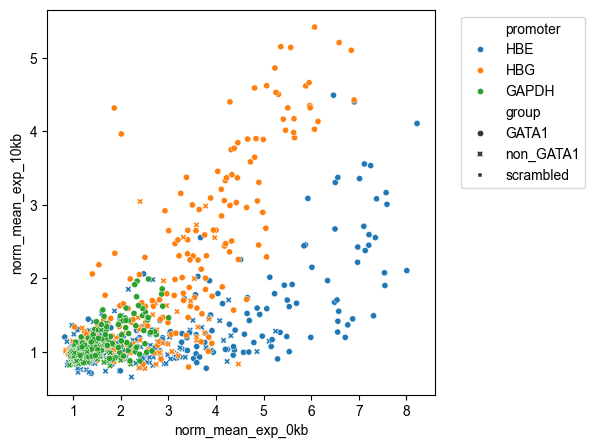

In [5]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=merged[merged["group"].isin(["GATA1", "non_GATA1", "scrambled"])], x="norm_mean_exp_0kb", y="norm_mean_exp_10kb", hue="promoter", style="group", s=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

<Figure size 220x220 with 0 Axes>

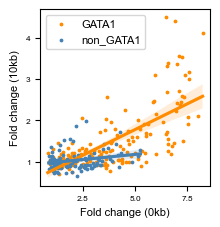

In [6]:
plt.figure(figsize=(2.2, 2.2))
g = sns.lmplot(data=merged[(merged["group"].isin(["GATA1", "non_GATA1"])) & (merged["promoter"] == "HBE")], x="norm_mean_exp_0kb", y="norm_mean_exp_10kb", hue = "group",hue_order=["GATA1", "non_GATA1"], palette={"GATA1":"darkorange", "non_GATA1":"steelblue"}, height=2.5, aspect=0.95, legend=False, fit_reg=True, scatter_kws={"s": 3, "alpha":1})
#sns.lineplot(x=[0,7],y=[0,7], color='grey', linestyle='--',legend=None, linewidth=0.75)
#sns.lineplot(x=[0,7], y=[1,1], color='grey', linestyle='--', legend=None, linewidth=0.75)
plt.legend(loc="upper left", fontsize=6)
for ax in g.axes.flatten():
    # Set spines visibility
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
#plt.title("Activity at 10kb v.s. 0kb (HBG)", fontsize=8)
plt.xlabel("Fold change (0kb)", fontsize=8)
plt.ylabel("Fold change (10kb)", fontsize=8)
#plt.xlim(0.5, 7)
#plt.ylim(0.5, 7)

plt.legend(loc="upper left", fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
#plt.text(5,3,f"slope={s1:.2f}",color="steelblue", fontsize=15)
#plt.text(4,1.5,f"slope={s2:.2f}",color="orange", fontsize=15)
#plt.tight_layout()
plt.savefig("DLP1_GATA_library_two_group_regression_HBE.svg", dpi=300)

<Figure size 220x220 with 0 Axes>

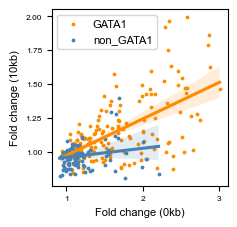

In [7]:
plt.figure(figsize=(2.2,2.2))
g = sns.lmplot(data=merged[(merged["group"].isin(["GATA1", "non_GATA1"])) & (merged["promoter"] == "GAPDH")], x="norm_mean_exp_0kb", y="norm_mean_exp_10kb", hue = "group",hue_order=["GATA1", "non_GATA1"], palette={"GATA1":"darkorange", "non_GATA1":"steelblue"}, height=2.5, aspect=1.05, legend=False, fit_reg=True, scatter_kws={"s": 3, "alpha":1})
#sns.lineplot(x=[0,7],y=[0,7], color='grey', linestyle='--',legend=None, linewidth=0.75)
#sns.lineplot(x=[0,7], y=[1,1], color='grey', linestyle='--', legend=None, linewidth=0.75)
plt.legend(loc="upper left", fontsize=6)
for ax in g.axes.flatten():
    # Set spines visibility
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
#plt.title("Activity at 10kb v.s. 0kb (HBG)", fontsize=8)
plt.xlabel("Fold change (0kb)", fontsize=8)
plt.ylabel("Fold change (10kb)", fontsize=8)
#plt.xlim(0.5, 7)
#plt.ylim(0.5, 7)

plt.legend(loc="upper left", fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
#plt.text(5,3,f"slope={s1:.2f}",color="steelblue", fontsize=15)
#plt.text(4,1.5,f"slope={s2:.2f}",color="orange", fontsize=15)
#plt.tight_layout()
plt.savefig("DLP1_GATA_library_two_group_regression_GAPDH.svg", dpi=300)

Text(0, 0.5, 'basal_promoter_activity')

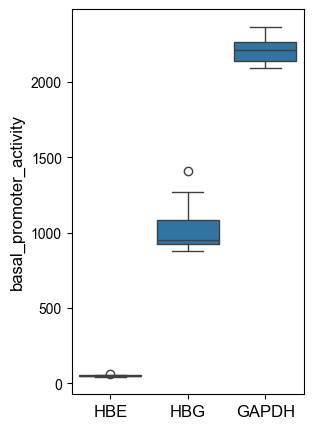

In [8]:
plt.figure(figsize=(3,5))
sns.boxplot(data=merged[merged["group"].isin(["scrambled"])], x="promoter", y="mean_exp_0kb")
plt.xlabel("")
plt.xticks(fontsize=12)
plt.ylabel("basal_promoter_activity", fontsize=12)

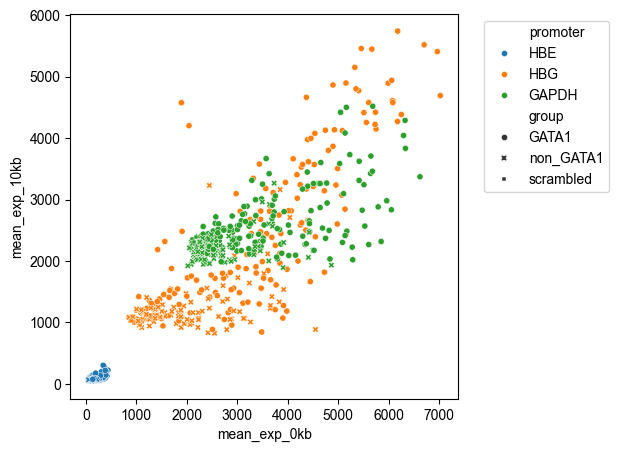

In [9]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=merged[merged["group"].isin(["GATA1", "non_GATA1", "scrambled"])], x="mean_exp_0kb", y="mean_exp_10kb", hue="promoter", style="group", s=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [10]:
merged_wide = merged.pivot(index=["CRE", "flag", "group"], values=["norm_mean_exp_0kb", "norm_mean_exp_10kb", "fold_change"], columns="promoter").reset_index()
merged_wide.columns = merged_wide.columns.map('_'.join)
merged_wide = merged_wide.dropna().reset_index(drop=True)

<Figure size 500x500 with 0 Axes>

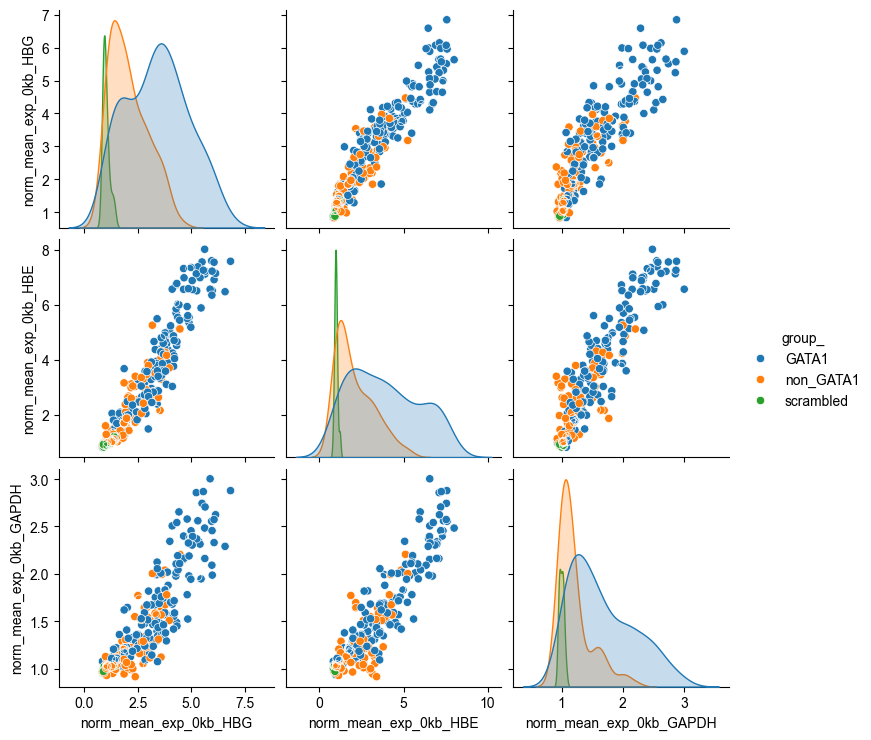

In [11]:
## Compare 0kb activity across promoters
plt.figure(figsize=(5,5))
sns.pairplot(data=merged_wide[["norm_mean_exp_0kb_HBG", "norm_mean_exp_0kb_HBE", "norm_mean_exp_0kb_GAPDH", "group_"]], hue="group_", hue_order=["GATA1", "non_GATA1", "scrambled"])

Text(0, 0.5, '0kb foldchange (HBE)')

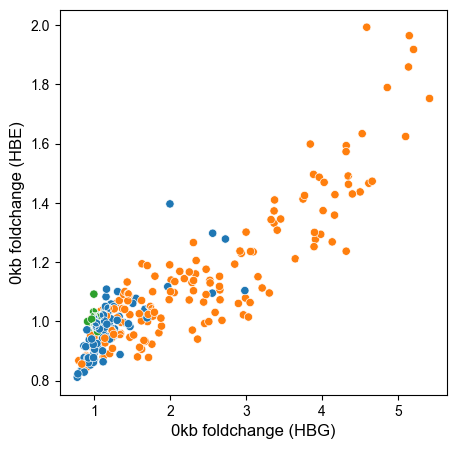

In [12]:
## Compare 0kb activity across promoters
plt.figure(figsize=(5,5))
sns.scatterplot(data=merged_wide[["norm_mean_exp_10kb_HBG", "norm_mean_exp_10kb_HBE", "norm_mean_exp_10kb_GAPDH", "group_"]], x = "norm_mean_exp_10kb_HBG", y="norm_mean_exp_10kb_GAPDH", hue="group_", hue_order=["non_GATA1","GATA1", "scrambled"], legend=False)
plt.xlabel("0kb foldchange (HBG)", fontsize=12)
plt.ylabel("0kb foldchange (HBE)", fontsize=12)

Text(0, 0.5, '0kb fold change (HBE)')

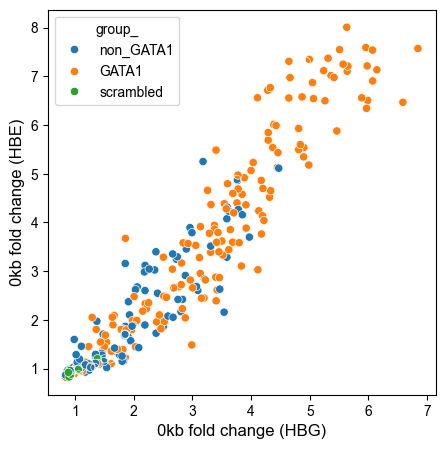

In [13]:
## Compare 0kb activity across promoters
plt.figure(figsize=(5,5))
sns.scatterplot(data=merged_wide[["norm_mean_exp_0kb_HBG", "norm_mean_exp_0kb_HBE", "norm_mean_exp_0kb_GAPDH", "group_"]], x = "norm_mean_exp_0kb_HBG", y="norm_mean_exp_0kb_HBE", hue="group_", hue_order=["non_GATA1","GATA1", "scrambled"])
plt.xlabel("0kb fold change (HBG)", fontsize=12)
plt.ylabel("0kb fold change (HBE)", fontsize=12)

In [14]:
merged_wide["HBG_10kb_rank"] = merged_wide["norm_mean_exp_10kb_HBG"].rank()
merged_wide["HBG_0kb_rank"] = merged_wide["norm_mean_exp_0kb_HBG"].rank()

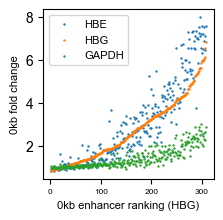

In [138]:
## Compare 10kb activity across promoters
plt.figure(figsize=(2.2, 2.2))

sns.scatterplot(data=merged_wide, x = "HBG_0kb_rank", y="norm_mean_exp_0kb_HBE", s=3, linewidth=0)
sns.scatterplot(data=merged_wide, x = "HBG_0kb_rank", y="norm_mean_exp_0kb_HBG", s=3, linewidth=0)
sns.scatterplot(data=merged_wide, x = "HBG_0kb_rank", y="norm_mean_exp_0kb_GAPDH", s=3, linewidth=0)
plt.legend(labels=["HBE", "HBG", "GAPDH"], fontsize=8)
plt.xlabel("0kb enhancer ranking (HBG)", fontsize=8)
plt.ylabel("0kb fold change", fontsize=8)
plt.xticks(fontsize=6)
plt.xticks(fontsize=6)
plt.savefig("across_promoters_0kb_ranking.svg", dpi=300)

<Figure size 500x500 with 0 Axes>

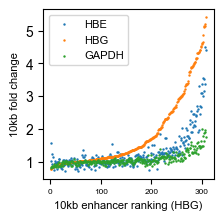

In [139]:
## Compare 10kb activity across promoters
plt.figure(figsize=(5,5))
plt.figure(figsize=(2.2, 2.2))

sns.scatterplot(data=merged_wide, x = "HBG_10kb_rank", y="norm_mean_exp_10kb_HBE", s=3, linewidth=0)
sns.scatterplot(data=merged_wide, x = "HBG_10kb_rank", y="norm_mean_exp_10kb_HBG", s=3, linewidth=0)
sns.scatterplot(data=merged_wide, x = "HBG_10kb_rank", y="norm_mean_exp_10kb_GAPDH", s=3, linewidth=0)
plt.legend(labels=["HBE", "HBG", "GAPDH"], fontsize=8)
plt.xlabel("10kb enhancer ranking (HBG)", fontsize=8)
plt.ylabel("10kb fold change", fontsize=8)
plt.xticks(fontsize=6)
plt.xticks(fontsize=6)
plt.savefig("across_promoters_10kb_ranking.svg", dpi=300)

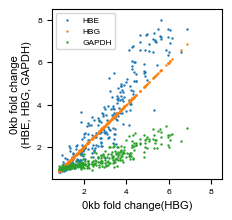

In [140]:
## Compare 0kb activity across promoters
plt.figure(figsize=(2.2, 2.2))

sns.scatterplot(data=merged_wide, x = "norm_mean_exp_0kb_HBG", y="norm_mean_exp_0kb_HBE", linewidth=0, s=3)
sns.scatterplot(data=merged_wide, x = "norm_mean_exp_0kb_HBG", y="norm_mean_exp_0kb_HBG", linewidth=0, s=3)
sns.scatterplot(data=merged_wide, x = "norm_mean_exp_0kb_HBG", y="norm_mean_exp_0kb_GAPDH", linewidth=0, s=3)
plt.legend(labels=["HBE", "HBG", "GAPDH"], fontsize=6, loc="upper left")
plt.xlabel("0kb fold change(HBG)", fontsize=8)
plt.ylabel("0kb fold change\n(HBE, HBG, GAPDH)", fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlim(0.5, 8.5)
plt.ylim(0.5, 8.5)
plt.savefig("across_promoters_0kb_scatter.svg", dpi=300)

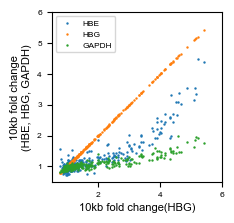

In [141]:
## Compare 10kb activity across promoters
plt.figure(figsize=(2.2, 2.2))

sns.scatterplot(data=merged_wide, x = "norm_mean_exp_10kb_HBG", y="norm_mean_exp_10kb_HBE", linewidth=0, s=3)
sns.scatterplot(data=merged_wide, x = "norm_mean_exp_10kb_HBG", y="norm_mean_exp_10kb_HBG", linewidth=0, s=3)
sns.scatterplot(data=merged_wide, x = "norm_mean_exp_10kb_HBG", y="norm_mean_exp_10kb_GAPDH", linewidth=0, s=3)
plt.legend(labels=["HBE", "HBG", "GAPDH"], fontsize=6, loc="upper left")
plt.xlabel("10kb fold change(HBG)", fontsize=8)
plt.ylabel("10kb fold change\n(HBE, HBG, GAPDH)", fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlim(0.5, 6)
plt.ylim(0.5, 6)
plt.savefig("across_promoters_10kb_scatter.svg", dpi=300)

In [19]:
merged_wide_0kb = merged_wide[["CRE_", "group_", "norm_mean_exp_0kb_GAPDH", "norm_mean_exp_0kb_HBE", "norm_mean_exp_0kb_HBG"]]
merged_wide_0kb["HBG"] = merged_wide_0kb["norm_mean_exp_0kb_HBG"]
merged_wide_0kb.columns = ["CRE", "group", "GAPDH", "HBE", "HBG", "HBG_base"]
merged_long_0kb = pd.melt(merged_wide_0kb, id_vars=["CRE", "group", "HBG_base"], value_vars=["GAPDH", "HBE", "HBG"], var_name = "promoter", value_name = "norm_mean_exp")

/tmp/ipykernel_1175958/4228405759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_wide_0kb["HBG"] = merged_wide_0kb["norm_mean_exp_0kb_HBG"]


In [20]:
merged_wide_10kb = merged_wide[["CRE_", "group_", "norm_mean_exp_10kb_GAPDH", "norm_mean_exp_10kb_HBE", "norm_mean_exp_10kb_HBG"]]
merged_wide_10kb["HBG"] = merged_wide_10kb["norm_mean_exp_10kb_HBG"]
merged_wide_10kb.columns = ["CRE", "group", "GAPDH", "HBE", "HBG", "HBG_base"]
merged_long_10kb = pd.melt(merged_wide_10kb, id_vars=["CRE", "group", "HBG_base"], value_vars=["GAPDH", "HBE", "HBG"], var_name = "promoter", value_name = "norm_mean_exp")

/tmp/ipykernel_1175958/218717457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_wide_10kb["HBG"] = merged_wide_10kb["norm_mean_exp_10kb_HBG"]


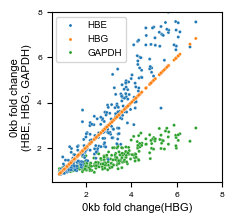

In [223]:
## Compare 0kb activity across promoters
plt.figure(figsize=(2.2, 2.2))
sns.scatterplot(data=merged_long_0kb, x = "HBG_base", y="norm_mean_exp", hue="promoter", hue_order=["HBE", "HBG", "GAPDH"], s=5)
plt.xlabel("0kb fold change(HBG)", fontsize=8)
plt.ylabel("0kb fold change\n(HBE, HBG, GAPDH)", fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.legend(fontsize=7)
plt.xlim(0.5, 8)
plt.ylim(0.5, 8)
plt.savefig("scatterplot_across_promoters_0kb.svg", dpi=300)

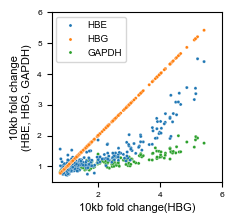

In [222]:
## Compare 10kb activity across promoters
plt.figure(figsize=(2.2, 2.2))
sns.scatterplot(data=merged_long_10kb, x = "HBG_base", y="norm_mean_exp", hue="promoter", hue_order=["HBE", "HBG", "GAPDH"], s=5)
plt.xlabel("10kb fold change(HBG)", fontsize=8)
plt.ylabel("10kb fold change\n(HBE, HBG, GAPDH)", fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.legend(fontsize=7)
plt.xlim(0.5, 6)
plt.ylim(0.5, 6)
plt.savefig("scatterplot_across_promoters_10kb.svg", dpi=300)

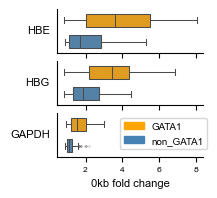

In [221]:
## 0kb across promoters
g = sns.catplot(
    kind="box", 
    data=merged_long_0kb[merged_long_0kb["group"].isin(["GATA1", "non_GATA1"])], 
    x="norm_mean_exp", 
    hue="group", 
    y="group", 
    row="promoter", 
    order=["GATA1", "non_GATA1"], 
    palette={"GATA1": "orange", "non_GATA1": "steelblue"}, 
    row_order=["HBE", "HBG", "GAPDH"], 
    orient="h", 
    height=0.8, 
    aspect=3.5,
    linewidth=0.75,
    dodge=False, 
    fliersize=0.2,
    width=0.6,
)

# Set labels and save
g.set(title=None,ylabel="", xlabel="0kb fold change")

for ax, promoter in zip(g.axes.flatten(), ["HBE", "HBG", "GAPDH"]):
    ax.text(-0.05, 0.4, promoter, fontsize=8, ha="right", va="bottom",transform=ax.transAxes)
# Adjust tick font size (6pt) and label font size (8pt)
for ax in g.axes.flatten():
    ax.tick_params(axis="x", labelsize=6)
    ax.tick_params(axis="y", labelsize=6)
    ax.set_yticks([])
    ax.xaxis.label.set_size(8)
    ax.yaxis.label.set_size(8)
g.figure.subplots_adjust(hspace=0.2)

gata1_patch = mpatches.Patch(color="orange", label="GATA1")
non_gata1_patch = mpatches.Patch(color="steelblue", label="non_GATA1")

plt.legend(
    handles=[gata1_patch, non_gata1_patch],
    fontsize=7,
    loc="upper left",
    bbox_to_anchor=(0.4,1)
)


plt.savefig("across_promoters_0kb.svg", dpi=300)

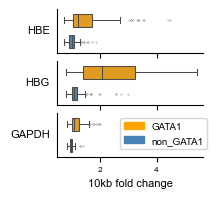

In [220]:
## 0kb across promoters
g = sns.catplot(
    kind="box", 
    data=merged_long_10kb[merged_long_10kb["group"].isin(["GATA1", "non_GATA1"])], 
    x="norm_mean_exp", 
    hue="group", 
    y="group", 
    row="promoter", 
    order=["GATA1", "non_GATA1"], 
    palette={"GATA1": "orange", "non_GATA1": "steelblue"}, 
    row_order=["HBE", "HBG", "GAPDH"], 
    orient="h", 
    height=0.8, 
    aspect=3.5,
    linewidth=0.75,
    dodge=False, 
    fliersize=0.2,
    width=0.6,
)

# Set labels and save
g.set(title=None,ylabel="", xlabel="10kb fold change")

for ax, promoter in zip(g.axes.flatten(), ["HBE", "HBG", "GAPDH"]):
    ax.text(-0.05, 0.4, promoter, fontsize=8, ha="right", va="bottom",transform=ax.transAxes)
# Adjust tick font size (6pt) and label font size (8pt)
for ax in g.axes.flatten():
    ax.tick_params(axis="x", labelsize=6)
    ax.tick_params(axis="y", labelsize=6)
    ax.set_yticks([])
    ax.xaxis.label.set_size(8)
    ax.yaxis.label.set_size(8)
g.figure.subplots_adjust(hspace=0.2)

gata1_patch = mpatches.Patch(color="orange", label="GATA1")
non_gata1_patch = mpatches.Patch(color="steelblue", label="non_GATA1")

plt.legend(
    handles=[gata1_patch, non_gata1_patch],
    fontsize=7,
    loc="upper left",
    bbox_to_anchor=(0.4, 1)
)


plt.savefig("across_promoters_10kb.svg", dpi=300)

/tmp/ipykernel_1175958/573743802.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


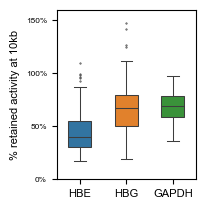

In [219]:
plt.figure(figsize=(1.8,2.2))

## Only plot enhancers active at 0kb, use 95% quantile as threshold
threshold = merged[merged["group"] == "scrambled"]["norm_mean_exp_0kb"].quantile(0.95)

ax = sns.boxplot(merged[(merged["norm_mean_exp_0kb"] > threshold) ], x="promoter", hue="promoter", y="fold_change", width=0.5, legend=False, fliersize=0.5, linewidth=0.75)
plt.ylabel("% retained activity at 10kb", fontsize=8)
plt.xlabel("")
plt.xticks(fontsize=8)
plt.yticks(fontsize=6)
plt.ylim(0,1.6)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

plt.savefig("percentage_retained_10kb_activity.svg", dpi=300)

In [218]:
print("% retained activity at 10kb for HBG:", merged[(merged["norm_mean_exp_0kb"] > threshold) & (merged["promoter"] == "HBG")]["fold_change"].mean())
print("% retained activity at 10kb for HBE:", merged[(merged["norm_mean_exp_0kb"] > threshold) & (merged["promoter"] == "HBE")]["fold_change"].mean())
print("% retained activity at 10kb for GAPDH:", merged[(merged["norm_mean_exp_0kb"] > threshold) & (merged["promoter"] == "GAPDH")]["fold_change"].mean())

% retained activity at 10kb for HBG: 0.6697858401290556
% retained activity at 10kb for HBE: 0.4503821057328034
% retained activity at 10kb for GAPDH: 0.6840797109079874


<Figure size 500x500 with 0 Axes>

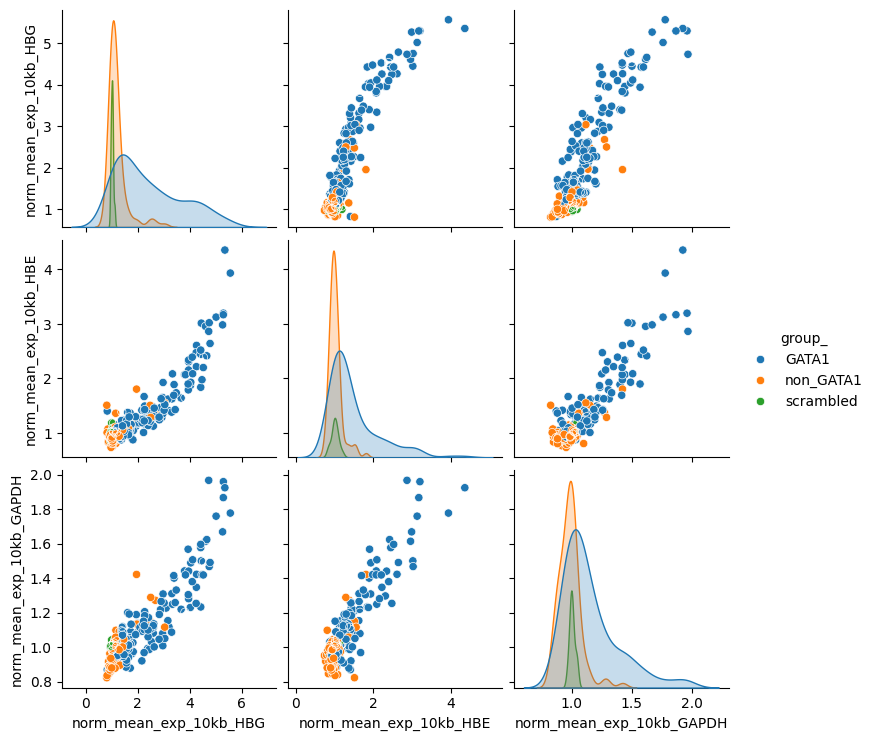

In [19]:
## Compare 10kb activity across promoters
plt.figure(figsize=(5,5))
sns.pairplot(data=merged_wide[["norm_mean_exp_10kb_HBG", "norm_mean_exp_10kb_HBE", "norm_mean_exp_10kb_GAPDH", "group_"]], hue="group_", hue_order=["GATA1", "non_GATA1", "scrambled"])

<Figure size 500x500 with 0 Axes>

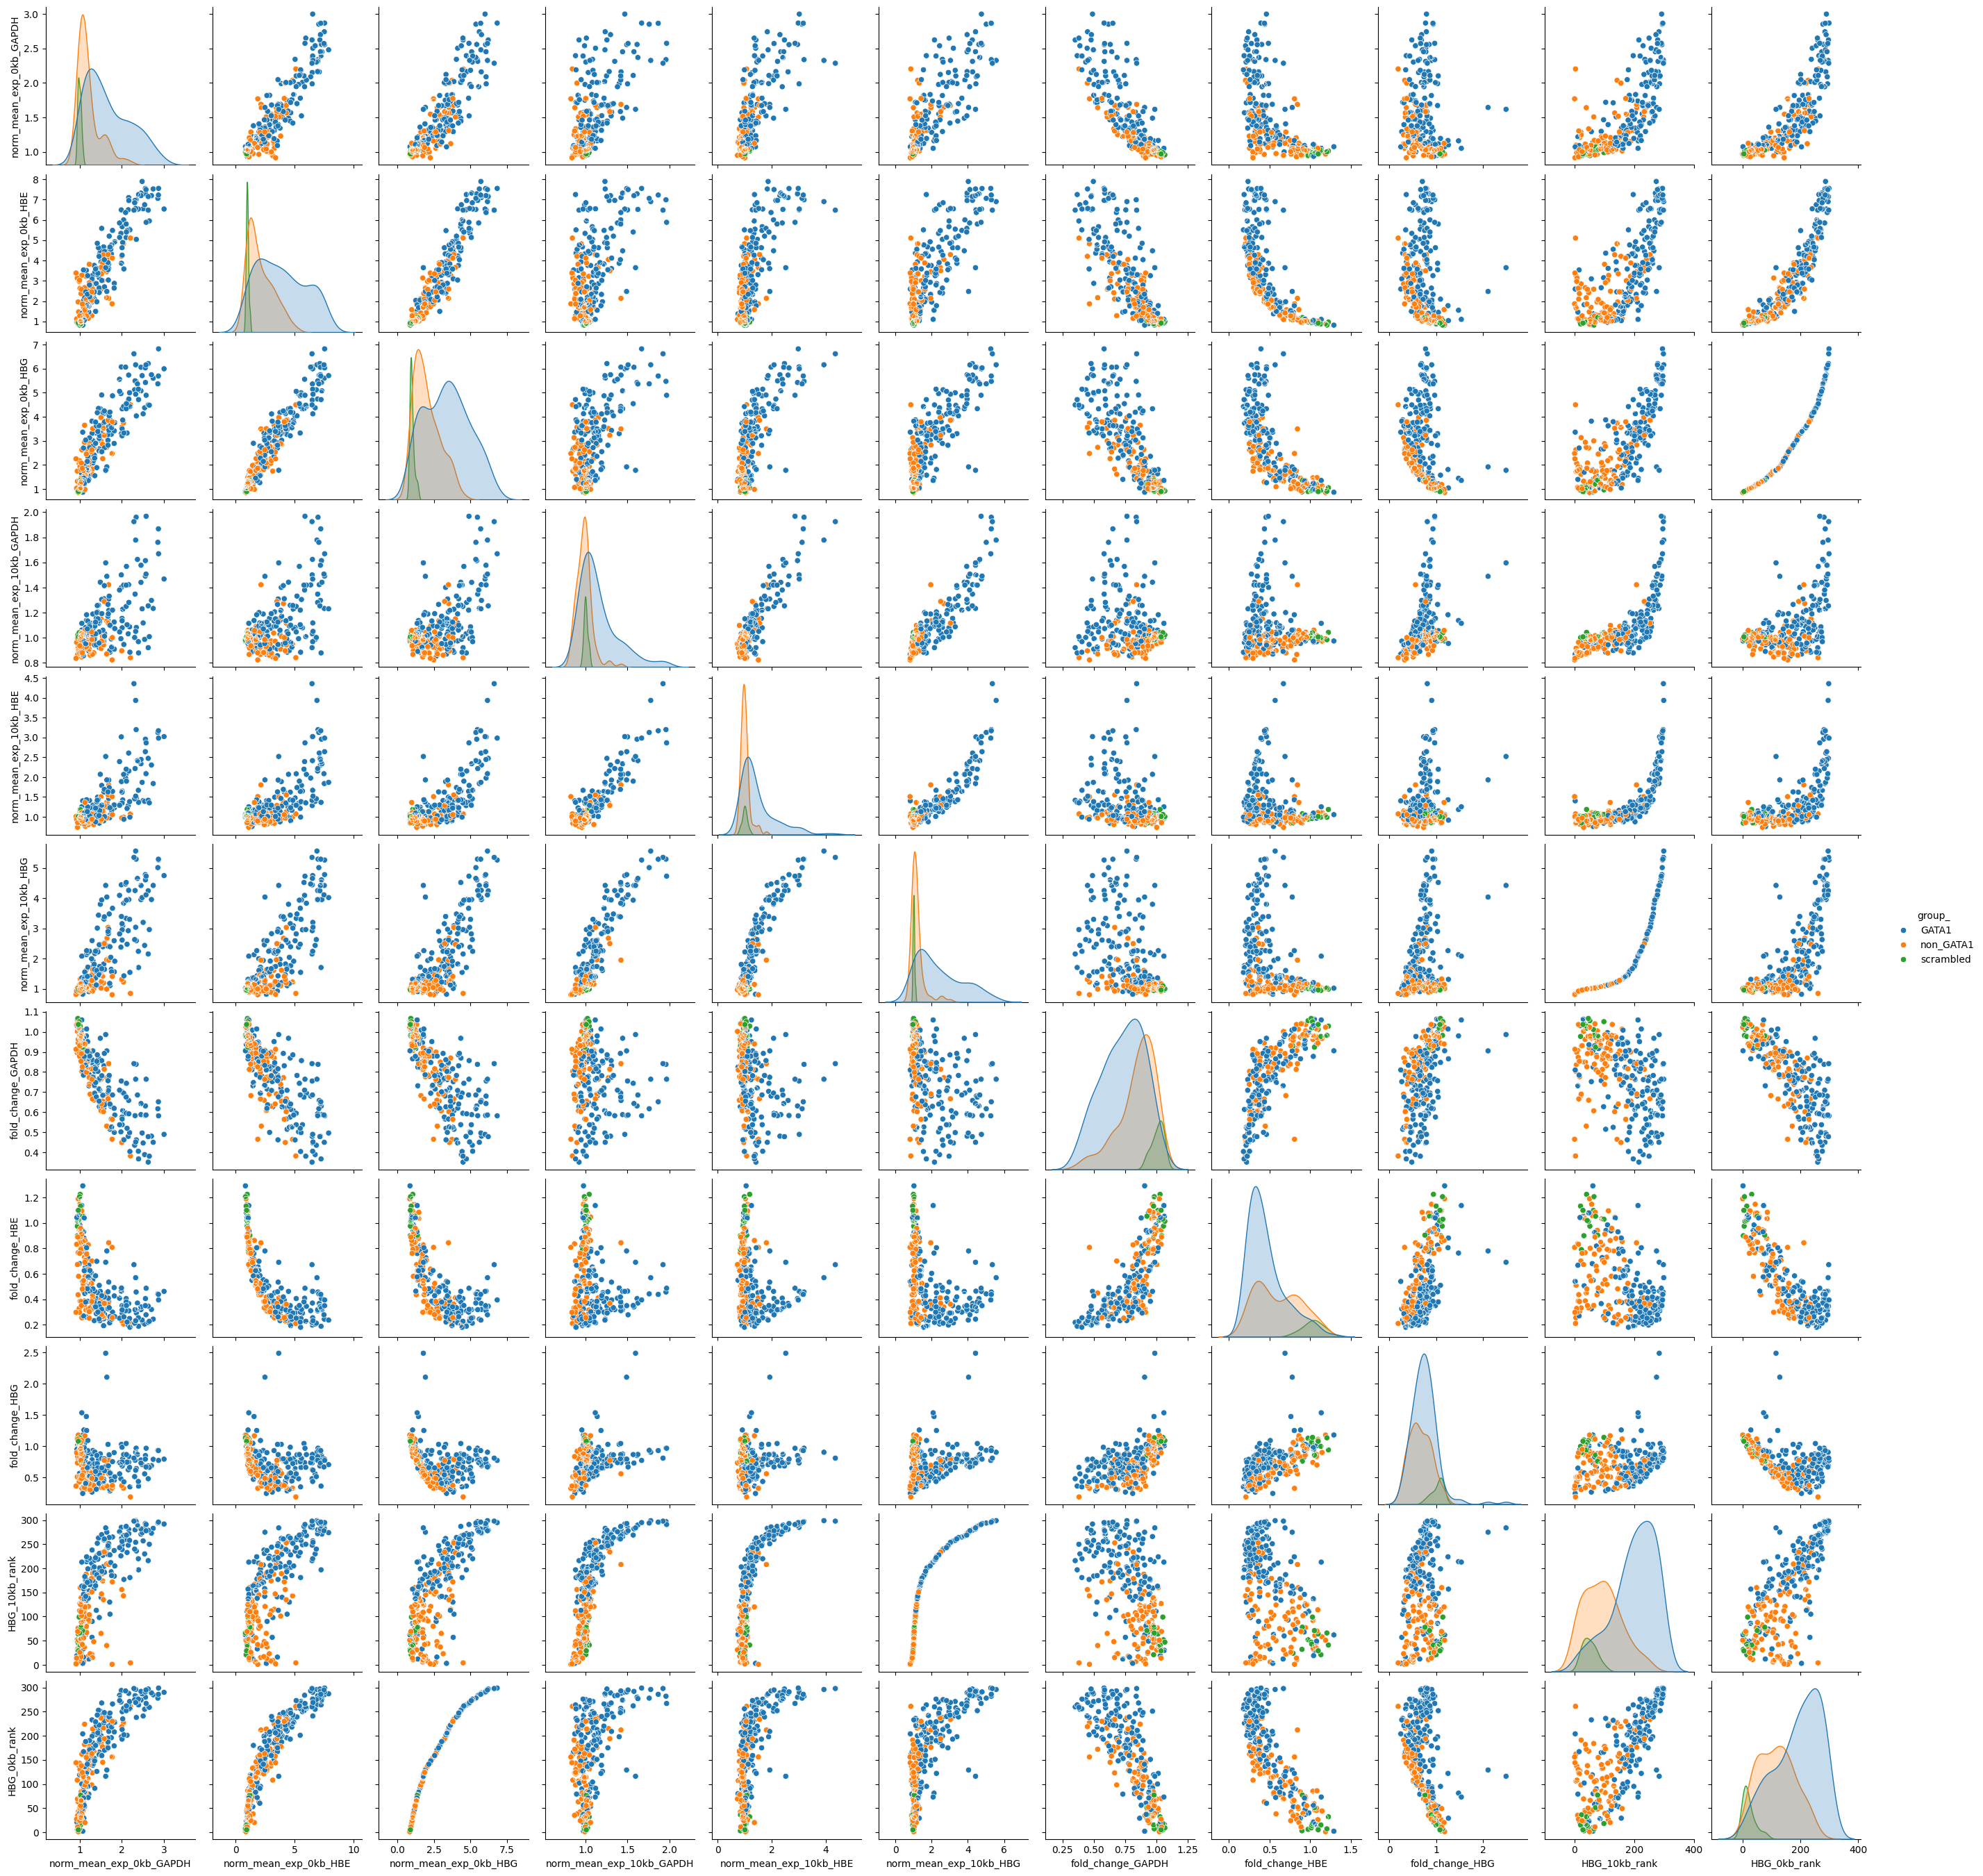

In [20]:
plt.figure(figsize=(5,5))
sns.pairplot(data=merged_wide, hue="group_", hue_order=["GATA1", "non_GATA1", "scrambled"])

In [21]:
fig = px.scatter(merged_wide, x='norm_mean_exp_0kb_HBG', y='norm_mean_exp_10kb_HBG', color="group_", hover_name='CRE_')

# Improve layout
fig.update_traces(marker=dict(size=7),
                  selector=dict(mode='markers+text'))
fig.update_layout(
    width=700,  # Width in pixels
    height=700,  # Height in pixels
)

/ref/bclab/software/yawei/conda/envs/bclab/lib/python3.11/site-packages/plotly/express/_core.py:1992: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [22]:
merged_wide.sort_values(by="fold_change_HBG")[:20]

CRE_     flag_         group_  \
107         chr19:2211983-2212232     top70      non_GATA1   
103       chr19:16258516-16258765    top100          GATA1   
82        chr16:27107309-27107558    top100          GATA1   
12        chr10:24569328-24569577   level_1          GATA1   
101     chr18:6683177-6683426_mut       mut  GATA1_mutated   
127        chr1:15886333-15886582     top70      non_GATA1   
1       chr10:101042746-101042995   level_3      non_GATA1   
13          chr10:5934050-5934299   level_3          GATA1   
262        chr8:73356429-73356678    top100          GATA1   
34          chr11:5275840-5276089  positive       positive   
167      chr2:151395698-151395947     top70      non_GATA1   
75        chr15:26082296-26082545     top70      non_GATA1   
11        chr10:23512467-23512716     top70      non_GATA1   
213        chr4:40238895-40239144     top70      non_GATA1   
134        chr1:18807400-18807649     top70      non_GATA1   
113       chr19:45515151-45515400     top70      non_GATA1   
100         chr18:6683177-6683426   level_1          GATA1   
161       chr22:26632690-26632939    top100          GATA1   
273  chr9:135952008-135952257_mut       mut  GATA1_mutated   
143        chr1:37999598-37999847    top100          GATA1   

     norm_mean_exp_0kb_GAPDH  norm_mean_exp_0kb_HBE  norm_mean_exp_0kb_HBG  \
107                 2.203055               5.103778               4.496718   
103                 1.074218               2.596338               3.361739   
82                  1.294237               3.098276               3.818141   
12                  1.719811               4.362225               3.872638   
101                 1.029547               2.669211               2.945846   
127                 1.249172               2.847127               3.134516   
1                   1.119364               3.266304               3.647809   
13                  1.712289               4.552422               3.795944   
262                 1.396283               3.615863               3.623704   
34                  1.240727               3.468001               3.278209   
167                 1.770268               1.868530               2.475753   
75                  1.054362               3.276453               2.628423   
11                  2.038230               4.824894               3.736329   
213                 1.115493               2.662627               2.940603   
134                 1.565238               4.284278               3.522733   
113                 1.507711               2.587582               2.999431   
100                 1.092638               3.535907               2.703583   
161                 2.190570               5.509294               4.422899   
273                 1.833694               4.848263               3.684745   
143                 2.395138               7.247817               4.713090   

     norm_mean_exp_10kb_GAPDH  norm_mean_exp_10kb_HBE  norm_mean_exp_10kb_HBG  \
107                  0.841551                1.074513                0.852623   
103                  0.870403                1.403640                0.825409   
82                   0.973499                1.008045                1.017467   
12                   0.885622                1.045613                1.109520   
101                  0.862917                0.922716                0.887369   
127                  0.861660                0.947006                0.957528   
1                    0.973864                1.148039                1.134254   
13                   0.898477                0.978635                1.182577   
262                  0.944532                1.039237                1.132259   
34                   0.891862                0.888078                1.035137   
167                  0.823678                1.509310                0.808752   
75                   0.847123                0.836825                0.861137   
11                   0.946927     

In [23]:
## Manually selected 27 library members for individual validations
selected = pd.read_csv("selected_for_validations.txt", sep="\t", header=None)[0].to_list()

In [24]:
selected_CREs = merged_wide[merged_wide["CRE_"].isin(selected)].reset_index(drop=True)

<Figure size 500x500 with 0 Axes>

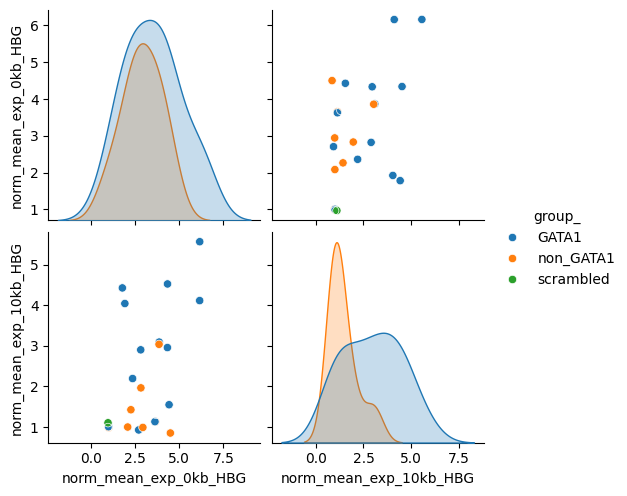

In [25]:
plt.figure(figsize=(5,5))
sns.pairplot(data=selected_CREs[["CRE_", "group_", "norm_mean_exp_0kb_HBG", "norm_mean_exp_10kb_HBG"]], hue="group_", hue_order=["GATA1", "non_GATA1", "scrambled"])

In [26]:
selected_CREs

CRE_      flag_         group_  \
0            chr10:101042746-101042995    level_3      non_GATA1   
1              chr10:92756299-92756548    level_1          GATA1   
2              chr13:97260009-97260258     top100          GATA1   
3              chr17:41500169-41500418    level_3      non_GATA1   
4                chr18:6683177-6683426    level_1          GATA1   
5                chr19:2211983-2212232      top70      non_GATA1   
6               chr1:12218581-12218830     top100          GATA1   
7               chr1:44213036-44213285    level_2      non_GATA1   
8              chr20:51033766-51034015      top70      non_GATA1   
9              chr20:63941738-63941987      top70      non_GATA1   
10             chr22:26632690-26632939     top100          GATA1   
11            chr2:168774027-168774276    level_4          GATA1   
12              chr2:38643808-38644057     top100          GATA1   
13  chr3:128343675-128343924_scrambled  scrambled      scrambled   
14              chr4:40238895-40239144      top70      non_GATA1   
15              chr4:74330482-74330731    level_1          GATA1   
16            chr8:101198521-101198770     top100          GATA1   
17        chr8:101198521-101198770_mut        mut  GATA1_mutated   
18              chr8:73356429-73356678     top100          GATA1   
19            chr9:127539593-127539842    level_2          GATA1   
20            chr9:135952008-135952257     top100          GATA1   
21        chr9:135952008-135952257_mut        mut  GATA1_mutated   
22            chr9:136790938-136791187      top70      non_GATA1   
23              chr9:27462508-27462757     top100          GATA1   

    norm_mean_exp_0kb_GAPDH  norm_mean_exp_0kb_HBE  norm_mean_exp_0kb_HBG  \
0                  1.119364               3.266304               3.647809   
1                  2.020828               4.887712               3.863105   
2                  2.007550               5.666174               4.329006   
3                  1.641189               3.448984               2.828905   
4                  1.092638               3.535907               2.703583   
5                  2.203055               5.103778               4.496718   
6                  2.326290               6.900022               6.156537   
7                  0.963402               0.952773               0.999891   
8                  1.547366               3.006121               2.263587   
9                  1.674966               4.292192               3.855036   
10                 2.190570               5.509294               4.422899   
11                 1.035301               0.896372               1.001874   
12                 2.102567               5.796844               4.335354   
13                 0.990105               1.031185               0.968580   
14                 1.115493               2.662627               2.940603   
15                 1.191866               3.253348               2.359560   
16                 1.644806               2.476101               1.921945   
17                 0.993690               0.965599               0.963186   
18                 1.396283               3.615863               3.623704   
19                 1.672471               3.547326               2.819538   
20                 2.571436               7.492935               6.153795   
21                 1.833694               4.848263               3.684745   
22                 1.042931               2.579003               2.081575   
23                 1.617993               3.647425               1.780749   

    norm_mean_exp_10kb_GAPDH  norm_mean_exp_10kb_HBE  norm_mean_exp_10kb_HBG  \
0                   0.973864                1.148039                1.134254   
1                   1.227512                1.426158                3.091212   
2                   1.079704                1.650738                2.956392   
3                   1.133881                1.240379                1.964015   
4      